In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_netflix = pd.read_csv('netflix_titles.csv')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_data = df_netflix.copy()
df_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
print(f"O conjunto de dados possui {len(df_data)} amostras e {len(df_data.columns)} colunas")

O conjunto de dados possui 8807 amostras e 12 colunas


Há dados sem informações

cast, listed_in, country podem ter mais do que um item

duração tem diversas formas: Season, Seasons, min

In [8]:
df_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

há 6 colunas com valores faltantes

Diretor, cast e country possuem uma alta porcentagem de dados faltante, então eles não serão removidos a primeiro momento

In [12]:
df_data['director'].fillna('No_data',inplace=True)
df_data['country'].fillna('No_data',inplace=True)
df_data['cast'].fillna('No_data',inplace=True)
df_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No_data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [13]:
len(df_data)

8807

In [14]:
df_data.dropna(inplace=True)

In [15]:
len(df_data)

8790

In [18]:
print(f"Após a remoção das linhas que possuíam dados faltantes nas colunas duration, rating e date_added, o novo conjunto possui {len(df_data)} amostras") 

Após a remoção das linhas que possuíam dados faltantes nas colunas duration, rating e date_added, o novo conjunto possui 8790 amostras


In [19]:
df_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [21]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


A coluna date_added não está em formato data

In [22]:
df_data['date_added'] = pd.to_datetime(df_data['date_added'])
df_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No_data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8717 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [24]:
df_data['month_added'] = df_data['date_added'].dt.month
df_data['year_added'] = df_data['date_added'].dt.year
df_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,No_data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,No_data,No_data,No_data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,No_data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


<AxesSubplot:xlabel='type', ylabel='count'>

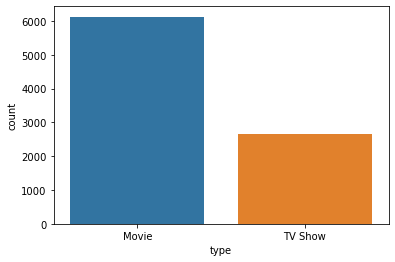

In [25]:
sns.countplot(x='type',data=df_data)

Netflix possui mais filmes do que series

In [31]:
df_data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [30]:
# values = []
# for elem in  df_data['type'].value_counts():
#     values.append(elem)
values = [elem for elem in df_data['type'].value_counts()]
values

[6126, 2664]

In [32]:
labels = list(df_data['type'].unique())

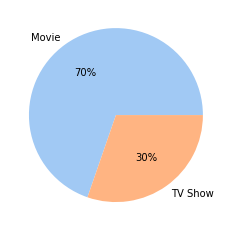

In [36]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [38]:
df_data['month_added'].value_counts()

7.0     819
12.0    795
9.0     766
4.0     760
10.0    757
8.0     749
3.0     734
1.0     728
6.0     725
11.0    698
5.0     628
2.0     558
Name: month_added, dtype: int64

Os meses com mais conteudo adicionado é julho e dezembro. Estes meses coincidem com meses de férias. Dezembro pode ter um volume maior devido aos conteudos de natal.

<AxesSubplot:xlabel='year_added', ylabel='Count'>

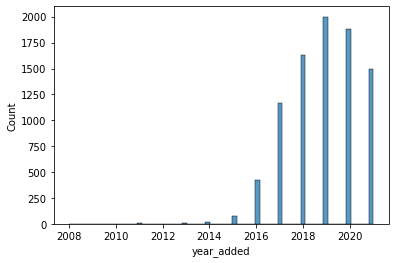

In [39]:
sns.histplot(data=df_data,x='year_added')

2020 e 2021 tiveram queda no lançamento de conteúdo. Isto pode ter ocorrido devido a pandemia.

In [43]:
df_series = df_data[df_data['type'] == 'TV Show']
df_series.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
1,s2,TV Show,Blood & Water,No_data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No_data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0


In [46]:
df_movies = df_data[df_data['type'] == 'Movie']
df_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No_data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No_data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,2021.0


In [49]:
count_movies = df_movies['year_added'].value_counts()
count_series = df_series['year_added'].value_counts()

In [51]:
count_movies

2019.0    1424
2020.0    1284
2018.0    1237
2021.0     993
2017.0     836
2016.0     249
2015.0      54
2014.0      18
2011.0      13
2013.0       6
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: year_added, dtype: int64

In [52]:
count_movies.rename('movies',inplace=True)
count_series.rename('series',inplace=True)
count_series

2020.0    594
2019.0    575
2021.0    505
2018.0    390
2017.0    328
2016.0    170
2015.0     23
2014.0      5
2013.0      5
2008.0      1
Name: series, dtype: int64

In [53]:
count_movies

2019.0    1424
2020.0    1284
2018.0    1237
2021.0     993
2017.0     836
2016.0     249
2015.0      54
2014.0      18
2011.0      13
2013.0       6
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: movies, dtype: int64

In [54]:
df_m_s = pd.DataFrame(columns=['year','c_m','c_s'])

In [55]:
df_m_s = pd.concat([count_movies,count_series],axis=1)
df_m_s

,movies,series
2008.0,1,1.0
2009.0,2,NaN
2010.0,1,NaN
2011.0,13,NaN
2012.0,3,NaN
2013.0,6,5.0
2014.0,18,5.0
2015.0,54,23.0
2016.0,249,170.0
2017.0,836,328.0


In [56]:
df_m_s.index.name = 'year'

In [57]:
df_m_s

,movies,series
year,,
2008.0,1,1.0
2009.0,2,NaN
2010.0,1,NaN
2011.0,13,NaN
2012.0,3,NaN
2013.0,6,5.0
2014.0,18,5.0
2015.0,54,23.0
2016.0,249,170.0


<AxesSubplot:xlabel='year'>

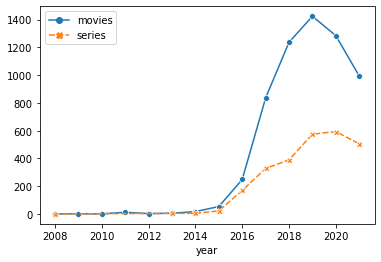

In [59]:
sns.lineplot(data=df_m_s,markers=True)